<a href="https://colab.research.google.com/github/jaytrey777/Project-2/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: 

Choose and describe 2 potential datasets for your second project.
You will have a lot more freedom in your second project than in your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to propose two possible datasets you would like to work with for Project 2 and indicate which is your first and which is your second choice.  

You can choose datasets from either:

1. This list of pre-approved datasets and complete the tasks listed below for both of them
Pre-approved Datasets:
Stroke Prediction Dataset
Adult income dataset
Car Insurance Data
Metabolic Syndrome Prediction - dataset by informatics-edu
Pump It Up Challenge: Driven Data
Cirrhosis Prediction Dataset
Spanish Wine Quality Dataset


2. Other dataset(s) that align with an interest or field of expertise you already have.  

If you choose to source your own data, please be sure it meets the below requirements:
has a clear target or labels to predict
has potential for interesting analysis
the data must be available for use (it is your responsibility to ensure that the license states that you are able to use it.)
the data must be appropriate for a professional environment
the data must not contain personal information
the data must not be a dataset used for any assignment, lecture, or task from the course
the data must not be a time series dataset. You will be able to identify these because each row will represent a moment or interval of time. These kinds of datasets follow special rules and are not appropriate for the kind of machine learning you have learned in this stack.
is reasonable to work with during the time you have
A great dataset would also have:

8-25 columns (features)
1000 - 100,000 rows (instances)
both numeric and categorical features
At least some missing features in both categorical and numeric columns, so you can show off your data-cleaning skills!
Here are some resources to help you find great datasets:

The 50 Best Free Datasets for Machine Learning
21 Places to Find Free Datasets for Data Science Projects
Best Public Datasets for Machine Learning and Data Science
Top 20+ Datasets for Machine Learning and Statistics Projects
70+ Machine Learning Datasets & Project Ideas
DataRobot Pathfinder
You may choose a regression or classification problem for each proposed data set, but you might consider a classification project since you already have a regression project in your portfolio.  This way you can show your skills with both!

If you choose 2 datasets from outside of the pre-approved list, at least one of the datasets you choose must be approved by the instructor before you can use it for your project.

For this Task:
Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

First choice: dataset 1
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Second choice: dataset 2
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

## Drive Mountng & Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,\
precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')                       

### Data Loading

In [2]:
filename1 = 'https://raw.githubusercontent.com/jaytrey777/Project-2/main/nbagames.csv'
df = pd.read_csv(filename1)
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [3]:
filename2 = 'https://raw.githubusercontent.com/jaytrey777/NBA-Home-Team-Wins/main/teams.csv'
df2 = pd.read_csv(filename2)
#Create new column that has team name to be substuited in the other dataframe for Team ID
df2['TEAM_NAME'] = df2['CITY'] + " " + df2['NICKNAME'] 
df2.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,TEAM_NAME
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,Atlanta Hawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws,Boston Celtics
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate,New Orleans Pelicans
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls,Chicago Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends,Dallas Mavericks


In [4]:
df['HOME_TEAM_ID'].value_counts()

1610612747    969
1610612748    959
1610612738    950
1610612759    942
1610612739    921
1610612744    907
1610612742    907
1610612746    903
1610612765    903
1610612745    900
1610612741    899
1610612760    893
1610612761    891
1610612754    891
1610612756    890
1610612749    883
1610612737    883
1610612763    882
1610612751    879
1610612755    878
1610612753    876
1610612762    874
1610612743    873
1610612757    871
1610612764    851
1610612740    851
1610612750    847
1610612758    840
1610612752    840
1610612766    798
Name: HOME_TEAM_ID, dtype: int64

### Analysis

1. [Source of data](https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download&select=games.csv) 

2. Brief description of data
  - This dataset was collected to work on NBA games data. Uses nba stats website to create this dataset.

  - There are 5 datasets :

    - games.csv : all games from 2004 season to last update with the date, teams and some details like number of points, etc.
    - games_details.csv : details of games dataset, all statistics of players for a given game
    - players.csv : players details (name)
    - ranking.csv : ranking of NBA given a day (split into west and east on CONFERENCE column
    - teams.csv : all teams of NBA

3. What is the target?
  - Did the home team win or lose?

4. What does one row represent? 
  - One row represents the team playing that night.

5. Is this a classification or regression problem?
  - This is a classification problem.

6. How many features does the data have?
  - There are 20 features.

7. How many rows are in the dataset?
  - There are 26651 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - The amount of data will make it challenging.  The cleaning should be pretty straight forward. 

# Part 2:

Using the approved dataset, clean and explore the dataset.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.
- Commit your file to your Github repository

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [6]:
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


## Exchanging Team ID's with Team Name

In [7]:
# Replace Home team ID with Team Name
counter = 0
b = 0
for team in df['HOME_TEAM_ID']:
  if team == df2['TEAM_ID'].iloc[b]:
    df['HOME_TEAM_ID'] = df2['TEAM_NAME']
    if counter <= 30:
        counter += 1
    elif b <= 30:
        counter = 0
        b += 1

In [8]:
# Replace Away team ID with Team Name
counter = 0
b = 0
for team in df['VISITOR_TEAM_ID']:
  if team == df2['TEAM_ID'].iloc[b]:
    df['VISITOR_TEAM_ID'] = df2['TEAM_NAME']
    if counter <= 30:
        counter += 1
    elif b <= 30:
        counter = 0
        b += 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      30 non-null     object 
 4   VISITOR_TEAM_ID   30 non-null     object 
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

## Duplicate Rows

In [10]:
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicate rows.')

There are 0 duplicate rows.


There are no duplicate rows in the data set so I am good here!

## Uncecessary Columns

I will drop the GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, TEAM_ID_home and TEAM_ID_away columns. They do not have any bearing on the target value.

In [11]:
drop_these = ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 
              'TEAM_ID_away']

df.drop(columns = drop_these, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HOME_TEAM_ID     30 non-null     object 
 1   VISITOR_TEAM_ID  30 non-null     object 
 2   SEASON           26651 non-null  int64  
 3   PTS_home         26552 non-null  float64
 4   FG_PCT_home      26552 non-null  float64
 5   FT_PCT_home      26552 non-null  float64
 6   FG3_PCT_home     26552 non-null  float64
 7   AST_home         26552 non-null  float64
 8   REB_home         26552 non-null  float64
 9   PTS_away         26552 non-null  float64
 10  FG_PCT_away      26552 non-null  float64
 11  FT_PCT_away      26552 non-null  float64
 12  FG3_PCT_away     26552 non-null  float64
 13  AST_away         26552 non-null  float64
 14  REB_away         26552 non-null  float64
 15  HOME_TEAM_WINS   26651 non-null  int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 3.3+ MB


## Missing Values

In [12]:
df.isna().sum()

HOME_TEAM_ID       26621
VISITOR_TEAM_ID    26621
SEASON                 0
PTS_home              99
FG_PCT_home           99
FT_PCT_home           99
FG3_PCT_home          99
AST_home              99
REB_home              99
PTS_away              99
FG_PCT_away           99
FT_PCT_away           99
FG3_PCT_away          99
AST_away              99
REB_away              99
HOME_TEAM_WINS         0
dtype: int64

This data set is missing 99 values in a lot of the columns. I will impute the average of the coulmn to address that any missing numerical values. The average will skew the data a bit more than the median, but I think this will be a better value to use.

## Inconsistent Values

After removing unnecessary columns, all of my data is numerical.  This means I will not have any inconsistent categories in my data set. 

## Univariate Visuals

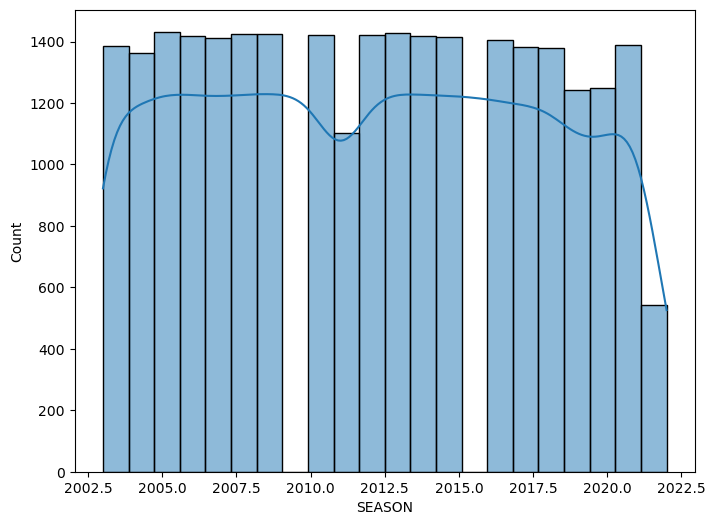

In [13]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, x = 'SEASON', bins = 22, kde = True)

This histogram shows that the same number of games are usually played for the season. Usually around 1400. They playoff can change the values. The lowest number of games 

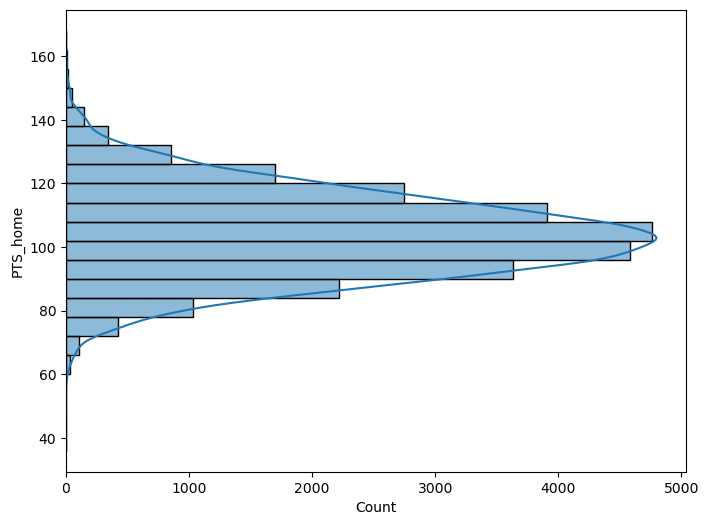

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, y = 'PTS_home', bins = 22, kde = True)

This violin plot shows that most teams score a little over 100 points a game, but the scores can range from around 60 to 150

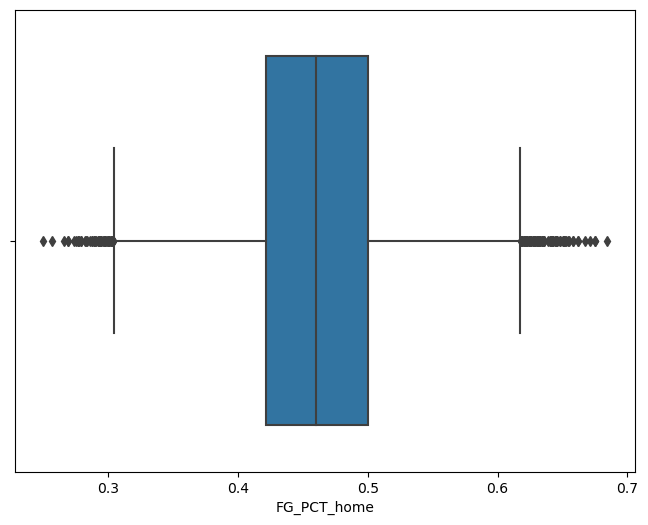

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df, x = 'FG_PCT_home');

This box plot shows that the majority of teams shoot between 42% ad 50% most nights. Some teams can have some really hot days shooting around 68%. Conversly there are some teams that have ice cold nights shooting less that 25%

<AxesSubplot: ylabel='FT_PCT_home'>

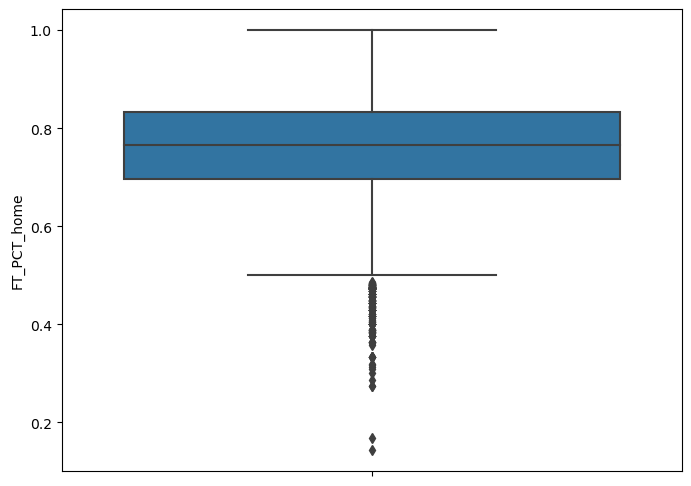

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data = df, y = 'FT_PCT_home')

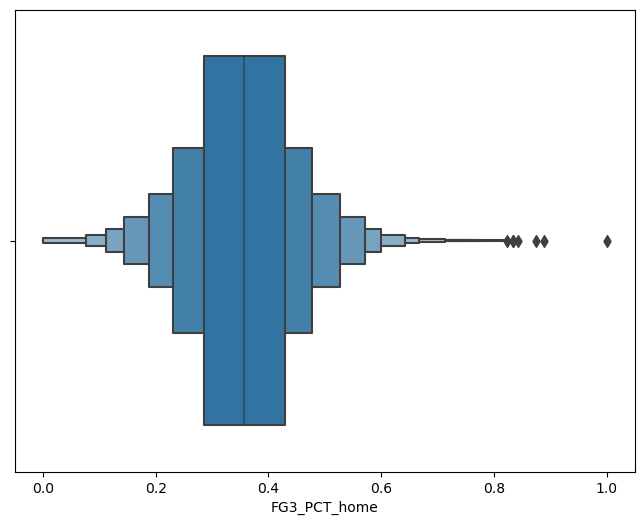

In [17]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxenplot(data = df, x = 'FG3_PCT_home')

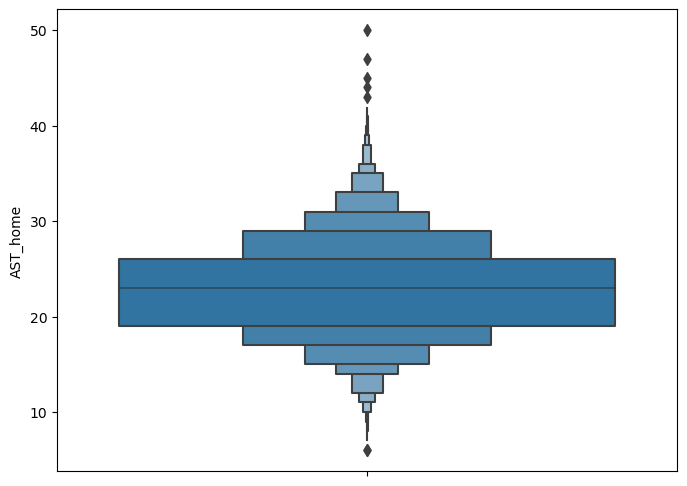

In [18]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxenplot(data = df, y = 'AST_home')

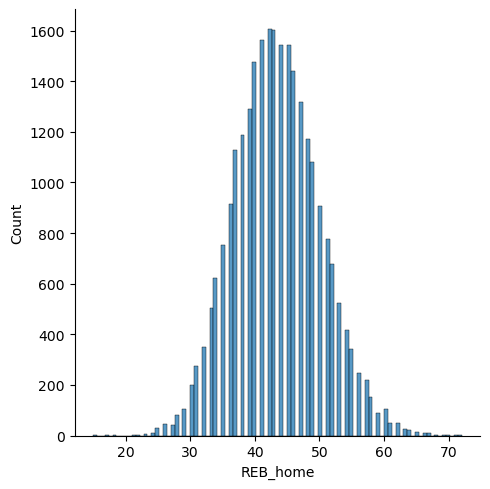

In [19]:
ax = sns.displot(data = df, x = 'REB_home')

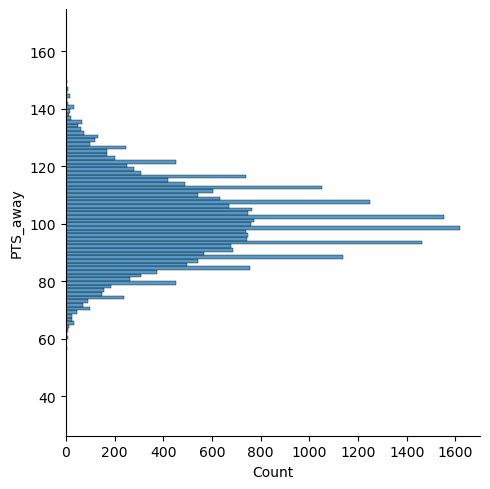

In [20]:
ax = sns.displot(data = df, y = 'PTS_away')

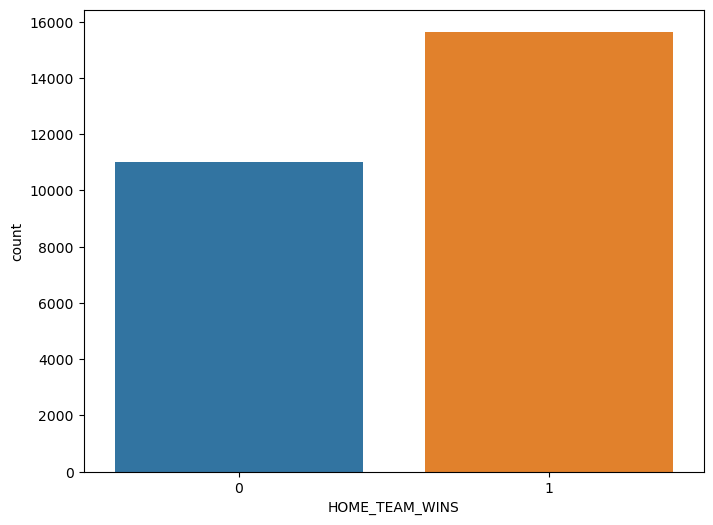

In [21]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(data = df, x = 'HOME_TEAM_WINS')

## Outliers


In [22]:
df.describe()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,26651.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2012.113879,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.587031,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,2003.000000,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2007.000000,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2012.000000,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2017.000000,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,2022.000000,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


There are no outliers. All of the values fall within ranges that make sense. 

# Part 3

For this part of the project, I will continue my data exploration by:
- Identifying any moderate or strong correlations between the target and features and/or between one feature and another using a correlation heatmap.
- Creating multivariate (multiple variables) exploratory visualizations to further understand the data and search for trends.
- Choose two visualizations from your analysis that demonstrate key trends found that will be of interest to a stakeholder. 


These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

## Heatmap

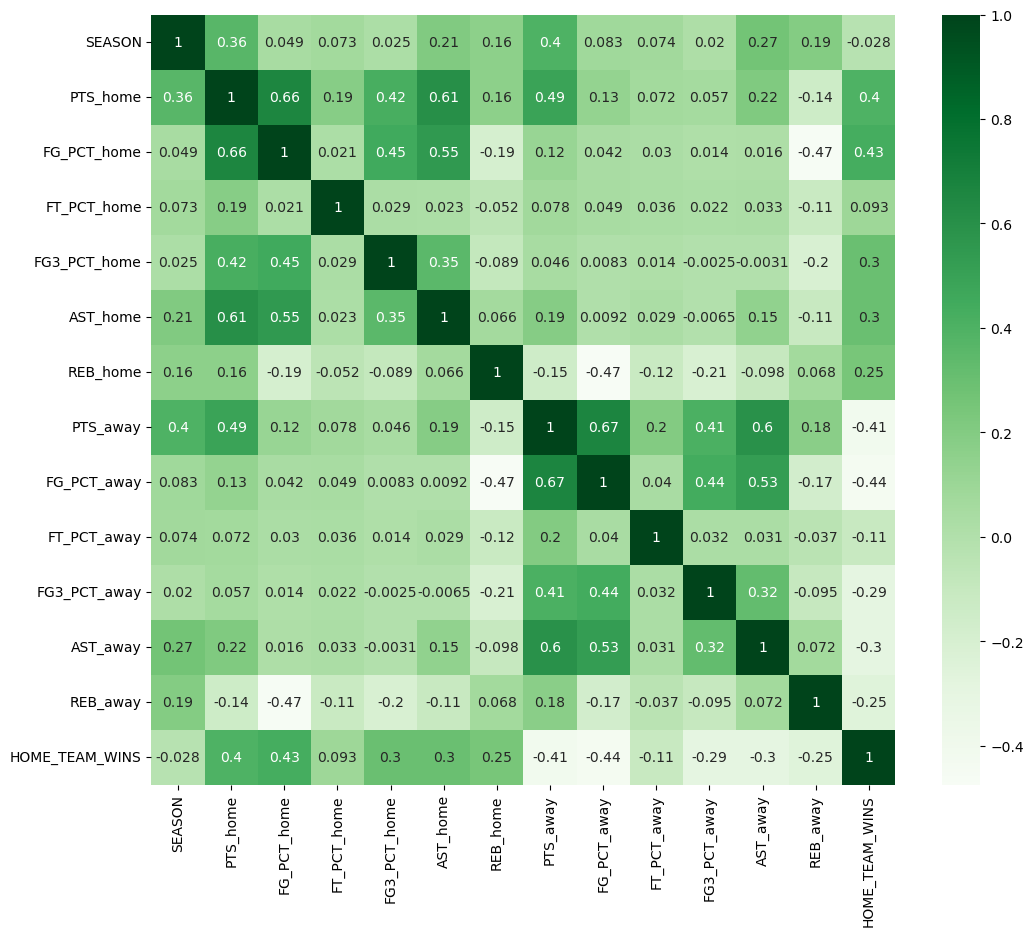

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'Greens', annot = True)

There are several features that have weak and moderate correlation.  I want to look at the following columns:
- PTS_away vs. PTS_home
- AST_home vs. PTS_home
- PTS_away vs. FG_PCT_away

## Multivariate Analysis

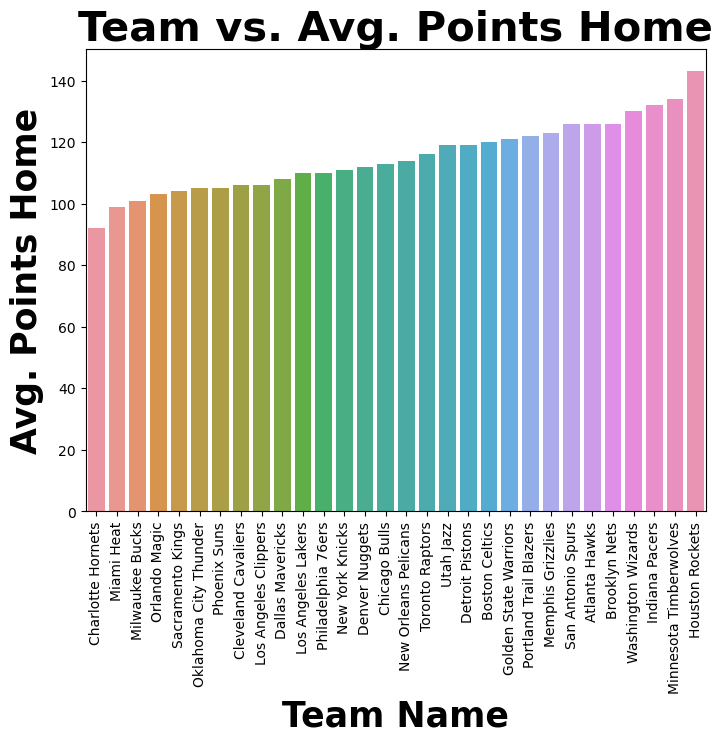

In [24]:
fig, ax = plt.subplots(figsize = (8, 6))
z = round(df.groupby(by = 'HOME_TEAM_ID', sort = True)['PTS_home'].mean(), 2)
z = z.sort_values()
ax = sns.barplot(x = z.index , y = z.sort_values(), order = z.index)
ax.set_title('Team vs. Avg. Points Home', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Team Name', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Avg. Points Home', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 90);

This Barchart shows that the Charlotte Hornets average the least amount of points as the home team and the Houston Rockets average the most. Most teams average between 100-120 points. 

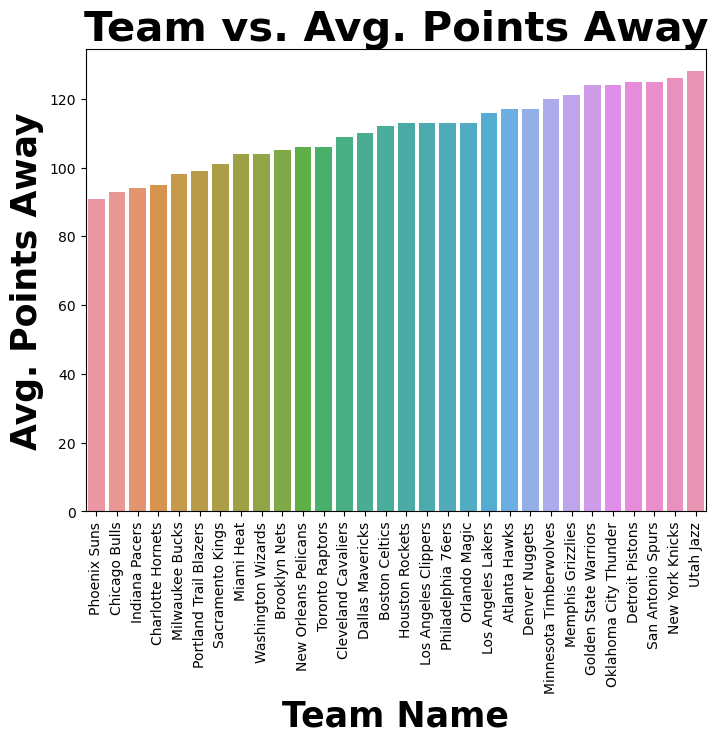

In [25]:
fig, ax = plt.subplots(figsize = (8, 6))
z = round(df.groupby(by = 'VISITOR_TEAM_ID', sort = True)['PTS_away'].mean(), 2)
z = z.sort_values()
ax = sns.barplot(x = z.index , y = z.sort_values(), order = z.index)
ax.set_title('Team vs. Avg. Points Away', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Team Name', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Avg. Points Away', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 90);

This Barchart shows that the Phoenix Suns average the least amount of points as the away team and the Utah Jazz average the most. 

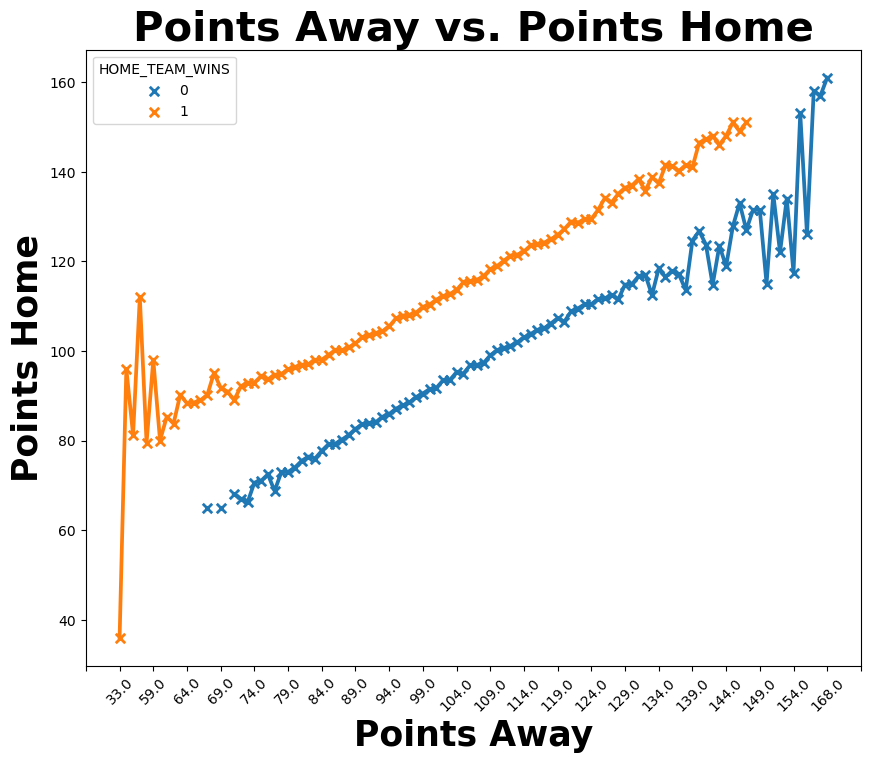

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.pointplot(data = df, x = 'PTS_away', y = 'PTS_home', 
                   hue = 'HOME_TEAM_WINS', errorbar = None, markers = 'x')

ax.set_title('Points Away vs. Points Home', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Points Away', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Points Home', fontsize = 25, fontweight = 'bold')
ax.set_xticks(range(-5, 115, 5))
plt.xticks(rotation=45);

This pointplot shows that if you have more points than your opponent, then you have a better chance of winning.

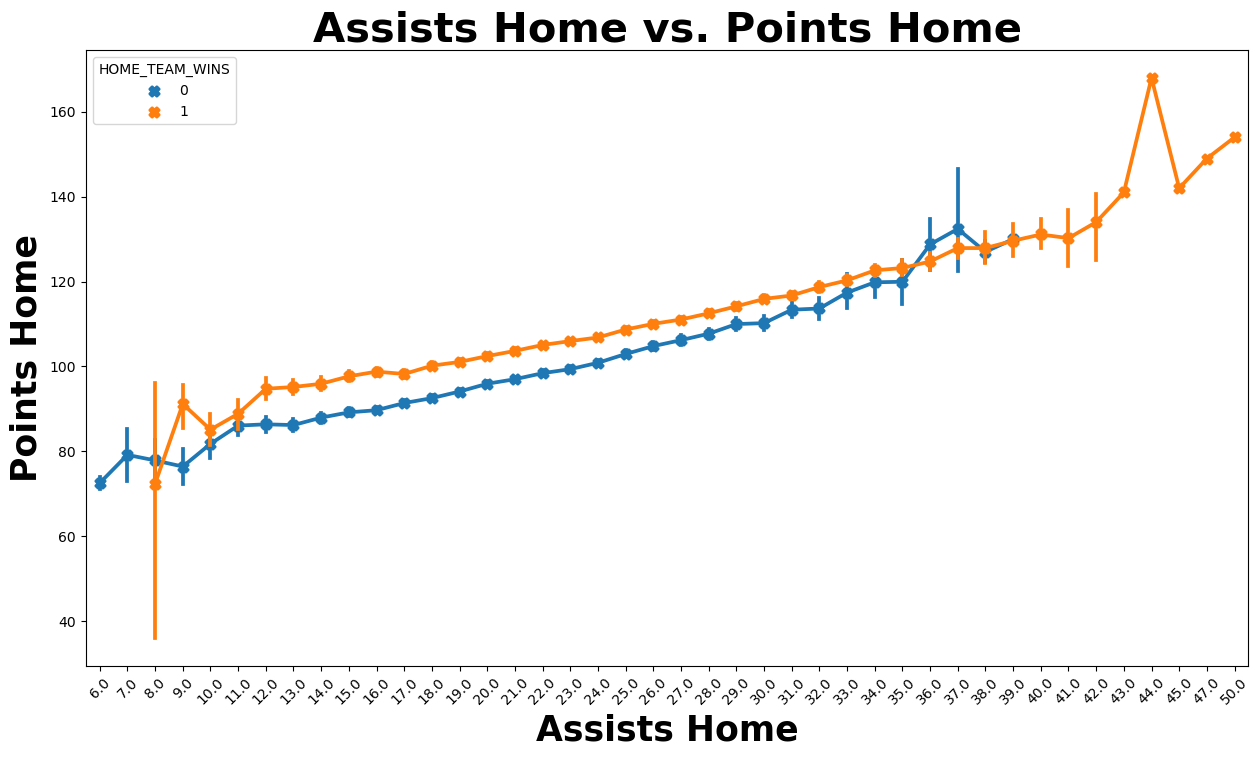

In [27]:
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.pointplot(data = df, x ='AST_home', y = 'PTS_home',
                   hue = 'HOME_TEAM_WINS', markers = 'X')

ax.set_title('Assists Home vs. Points Home', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('Assists Home', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Points Home', fontsize = 25, fontweight = 'bold')
ax.tick_params(axis='x', rotation=45)

This pointplot shows that the points scored and the assists accumulated do not have a significant impact on winning. There is however a direct impact on the point scored and the assists. The more assists you obtain, the higher the points.

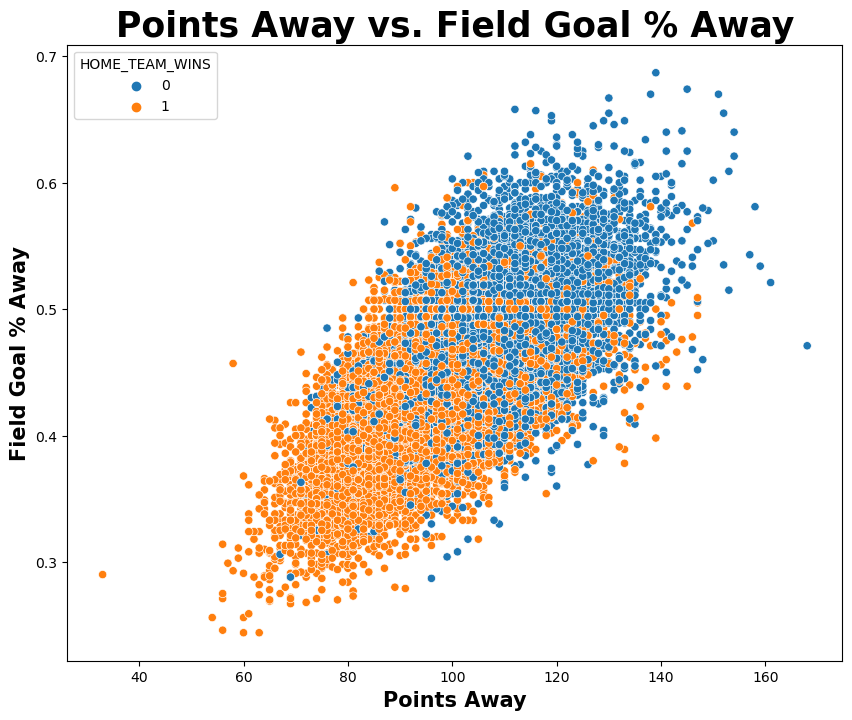

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(data = df, x ='PTS_away', y = 'FG_PCT_away', hue = 'HOME_TEAM_WINS')

ax.set_title('Points Away vs. Field Goal % Away', fontsize = 25, fontweight = 'bold')
ax.set_xlabel('Points Away', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Field Goal % Away', fontsize = 15, fontweight = 'bold');

This scatter plot shows the lower you can keep your opponents field goal percentage and points, the greater your chances of winning. It has a moderate positive correlation.

# Part 4

## Modeling

- Fit and evaluate multiple types of models on your data.
- Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
- Use GridSearchCV to tune some of the hyperparameters of each model.
- Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 
- Choose your "production" model and justify this decision using the metrics most important to your business problem.

In [29]:
## Define a function that prints out the scores for the model
def metrics(model, X_train, y_train, X_test, y_test, zero_division=0,
           name = 'Model', average = 'binary'):

  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Create a dataframe of scores to return
  scores = pd.DataFrame()
  
  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)
  
  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores

## Preprocessing

In [30]:
df['HOME_TEAM_WINS'].value_counts() # Checking to see if data is balanced

1    15645
0    11006
Name: HOME_TEAM_WINS, dtype: int64

In [31]:
# Separating the target varaible from the features
X = df.drop(columns = (['HOME_TEAM_WINS', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'PTS_away'])).copy()
y = df['HOME_TEAM_WINS'].copy()

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEASON        26651 non-null  int64  
 1   PTS_home      26552 non-null  float64
 2   FG_PCT_home   26552 non-null  float64
 3   FT_PCT_home   26552 non-null  float64
 4   FG3_PCT_home  26552 non-null  float64
 5   AST_home      26552 non-null  float64
 6   REB_home      26552 non-null  float64
 7   FG_PCT_away   26552 non-null  float64
 8   FT_PCT_away   26552 non-null  float64
 9   FG3_PCT_away  26552 non-null  float64
 10  AST_away      26552 non-null  float64
 11  REB_away      26552 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.4 MB


In [33]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 26651 entries, 0 to 26650
Series name: HOME_TEAM_WINS
Non-Null Count  Dtype
--------------  -----
26651 non-null  int64
dtypes: int64(1)
memory usage: 208.3 KB


### Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
18996,2003,92.0,0.447,0.933,0.200,25.0,45.0,0.330,0.840,0.571,21.0,54.0
11216,2008,100.0,0.461,0.952,0.435,17.0,43.0,0.476,0.875,0.500,22.0,41.0
22730,2016,120.0,0.537,0.762,0.533,24.0,41.0,0.459,1.000,0.382,32.0,44.0
5502,2012,105.0,0.526,0.786,0.483,28.0,33.0,0.432,0.700,0.417,20.0,35.0
5995,2012,90.0,0.500,0.688,0.269,28.0,42.0,0.474,0.760,0.435,23.0,33.0


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19988 entries, 18996 to 23654
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEASON        19988 non-null  int64  
 1   PTS_home      19909 non-null  float64
 2   FG_PCT_home   19909 non-null  float64
 3   FT_PCT_home   19909 non-null  float64
 4   FG3_PCT_home  19909 non-null  float64
 5   AST_home      19909 non-null  float64
 6   REB_home      19909 non-null  float64
 7   FG_PCT_away   19909 non-null  float64
 8   FT_PCT_away   19909 non-null  float64
 9   FG3_PCT_away  19909 non-null  float64
 10  AST_away      19909 non-null  float64
 11  REB_away      19909 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.0 MB


In [36]:
median_imputer = SimpleImputer(strategy = 'median') #imptes the median value of the column for any missing vaules
scaler = StandardScaler() #scales data

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = make_column_selector(dtype_include="number")

numerical_tuple = (numerical_pipeline, numerical_selector)

In [37]:
preprocessor = make_column_transformer(numerical_tuple,
                                       remainder='passthrough', 
                                       verbose_feature_names_out=False)
preprocessor.fit(X_train) #fits training data to preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                  verbose_feature_names_out=False)

## Logistic Regression

In [38]:
log_reg = LogisticRegression(C = 1000)
log_reg_pipeline = make_pipeline(preprocessor, log_reg)
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(C=1000))])

In [39]:
log_reg_train_predictions = log_reg_pipeline.predict(X_train)
log_reg_test_predictions = log_reg_pipeline.predict(X_test)

### Classification Report

In [40]:
#Metrics
print('Logistic Regression Training Data Metrics:\n', classification_report(y_train, log_reg_train_predictions))
print('')
print('Logistic Regression Testing Data Metrics:\n', classification_report(y_test, log_reg_test_predictions))

Logistic Regression Training Data Metrics:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      8231
           1       0.88      0.90      0.89     11757

    accuracy                           0.87     19988
   macro avg       0.87      0.87      0.87     19988
weighted avg       0.87      0.87      0.87     19988


Logistic Regression Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2775
           1       0.88      0.90      0.89      3888

    accuracy                           0.87      6663
   macro avg       0.87      0.87      0.87      6663
weighted avg       0.87      0.87      0.87      6663



### Confusion Matrix

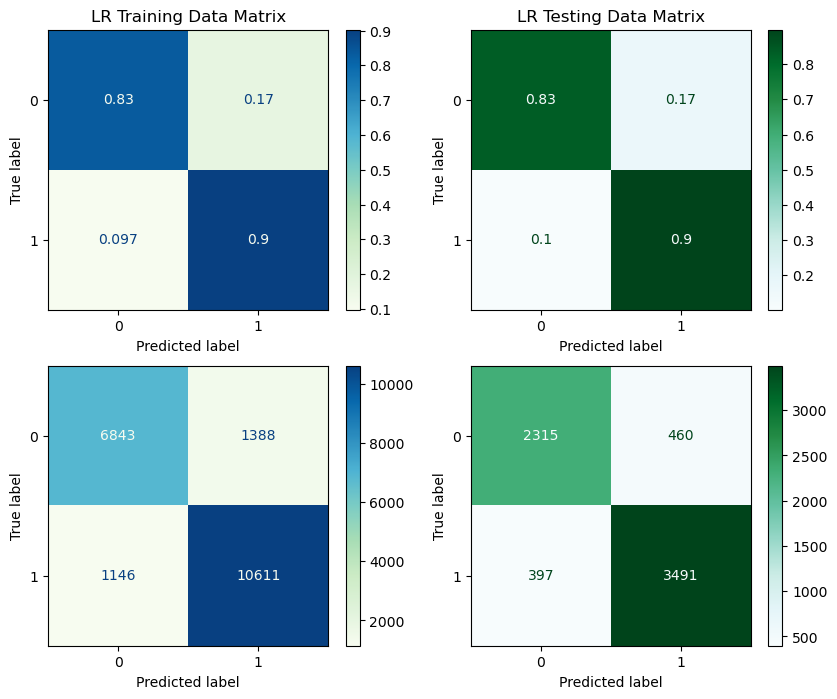

In [41]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('LR Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')
axes[0][1].set_title('LR Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [42]:
lr = metrics(log_reg_pipeline, X_train, y_train, X_test, 
             y_test, name = 'Default LR Model')

## Tuned Logistic Regression

In [43]:
log_reg_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(C=1000))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                      

### GridSearch

In [44]:
# creating parameters dictionary for gridsearch
log_reg_parameters_dict = {'logisticregression__penalty': ['l1', 'l2'],
                           'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
                           'logisticregression__n_jobs': [-1],
                           'logisticregression__solver': ['liblinear', 'lbfgs'],
                           'logisticregression__class_weight': ['balanced', None]}

In [45]:
lr_grid_search = GridSearchCV(log_reg_pipeline, log_reg_parameters_dict)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=1000))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000, 10000],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__n_jobs': [-1],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'lbfgs']})

In [46]:
lr_grid_search.best_params_

{'logisticregression__C': 1,
 'logisticregression__class_weight': None,
 'logisticregression__n_jobs': -1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [47]:
log_reg2 = LogisticRegression(C = 0.01, class_weight = 'balanced',
                              n_jobs = -1, penalty = 'l1', solver = 'liblinear')
log_reg_pipeline2 = make_pipeline(preprocessor, log_reg2)
log_reg_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced', n_jobs=-1,
                                    penalty='l1', solver='liblinear'))])

In [48]:
log_reg_train_predictions2 = log_reg_pipeline2.predict(X_train)
log_reg_test_predictions2 = log_reg_pipeline2.predict(X_test)

### Classification Report

In [49]:
#Metrics
print('Tuned Logistic Regression Training Data Metrics:\n', classification_report(y_train, log_reg_train_predictions2))
print('')
print('Tuned Logistic Regression Testing Data Metrics:\n', classification_report(y_test, log_reg_test_predictions2))

Tuned Logistic Regression Training Data Metrics:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      8231
           1       0.90      0.86      0.88     11757

    accuracy                           0.86     19988
   macro avg       0.86      0.87      0.86     19988
weighted avg       0.87      0.86      0.87     19988


Tuned Logistic Regression Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2775
           1       0.90      0.85      0.88      3888

    accuracy                           0.86      6663
   macro avg       0.86      0.86      0.86      6663
weighted avg       0.86      0.86      0.86      6663



### Confusion Matrix

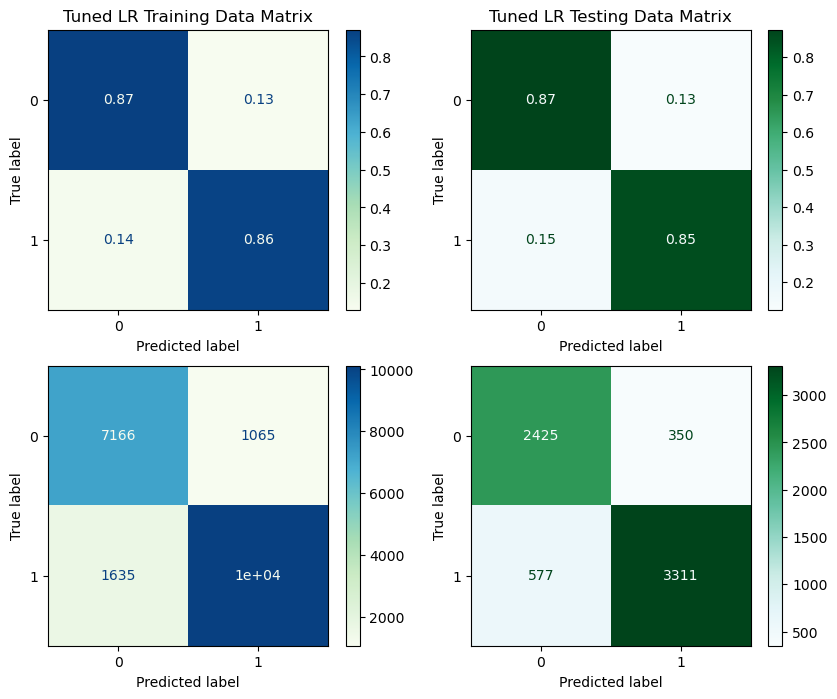

In [50]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('Tuned LR Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('Tuned LR Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [51]:
tuned_lr = metrics(log_reg_pipeline2, X_train, y_train, X_test, 
                   y_test, name = 'Tuned LR Model')
metrics_df = pd.concat([lr, tuned_lr])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202


## K Nearest Neighbors

In [52]:
knn = KNeighborsClassifier()
knn_pipeline = make_pipeline(preprocessor, knn)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [53]:
knn_train_predictions = knn_pipeline.predict(X_train)
knn_test_predictions = knn_pipeline.predict(X_test)

### Classification Report

In [54]:
#Metrics
print('KNN Training Data Metrics:\n', classification_report(y_train, knn_train_predictions))
print('')
print('KNN Testing Data Metrics:\n', classification_report(y_test, knn_test_predictions))

KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      8231
           1       0.90      0.92      0.91     11757

    accuracy                           0.89     19988
   macro avg       0.89      0.88      0.89     19988
weighted avg       0.89      0.89      0.89     19988


KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2775
           1       0.85      0.88      0.87      3888

    accuracy                           0.84      6663
   macro avg       0.84      0.83      0.83      6663
weighted avg       0.84      0.84      0.84      6663



### Confusion Matrix

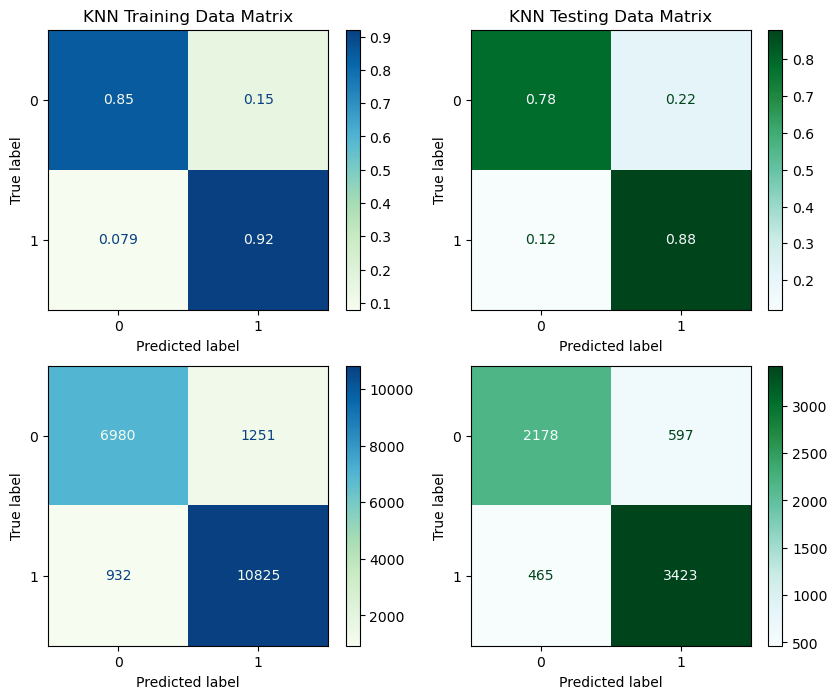

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('KNN Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('KNN Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [56]:
knn_ = metrics(knn_pipeline, X_train, y_train, X_test, 
                   y_test, name = 'KNN Model')
metrics_df = pd.concat([metrics_df, knn_])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706


## Tuned K Nearest Neighbors

In [57]:
knn_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                        

In [58]:
knn_parameters_dict = {'kneighborsclassifier__leaf_size' : list(range(1, 50, 10)),
                      'kneighborsclassifier__n_neighbors': list(range(1, 20, 4)),
                      'kneighborsclassifier__weights': ['uniform', 'distance'],
                      'kneighborsclassifier__n_jobs': [-1],}

### GridSearch

In [59]:
knn_grid_search = GridSearchCV(knn_pipeline, knn_parameters_dict)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [1, 11, 21, 31, 41],
                         'kneighborsclassifier__n_jobs': [-1],
                         'kneighborsclassifier__n_neighbors': [1, 5, 9, 13, 17],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [60]:
knn_grid_search.best_params_

{'kneighborsclassifier__leaf_size': 1,
 'kneighborsclassifier__n_jobs': -1,
 'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__weights': 'distance'}

In [61]:
knn2 = KNeighborsClassifier(leaf_size = 1, n_neighbors = 17, 
                            weights = 'distance', n_jobs = -1)
knn_pipeline2 = make_pipeline(preprocessor, knn2)
knn_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=17,
                                      weights='distance'))])

In [62]:
knn_train_predictions2 = knn_pipeline2.predict(X_train)
knn_test_predictions2 = knn_pipeline2.predict(X_test)

### Classification Report

In [63]:
#Metrics
print('Tuned KNN Training Data Metrics:\n', classification_report(y_train, knn_train_predictions2))
print('')
print('Tuned KNN Testing Data Metrics:\n', classification_report(y_test, knn_test_predictions2))

Tuned KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8231
           1       1.00      1.00      1.00     11757

    accuracy                           1.00     19988
   macro avg       1.00      1.00      1.00     19988
weighted avg       1.00      1.00      1.00     19988


Tuned KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2775
           1       0.86      0.89      0.88      3888

    accuracy                           0.85      6663
   macro avg       0.85      0.85      0.85      6663
weighted avg       0.85      0.85      0.85      6663



### Confusion Matrix

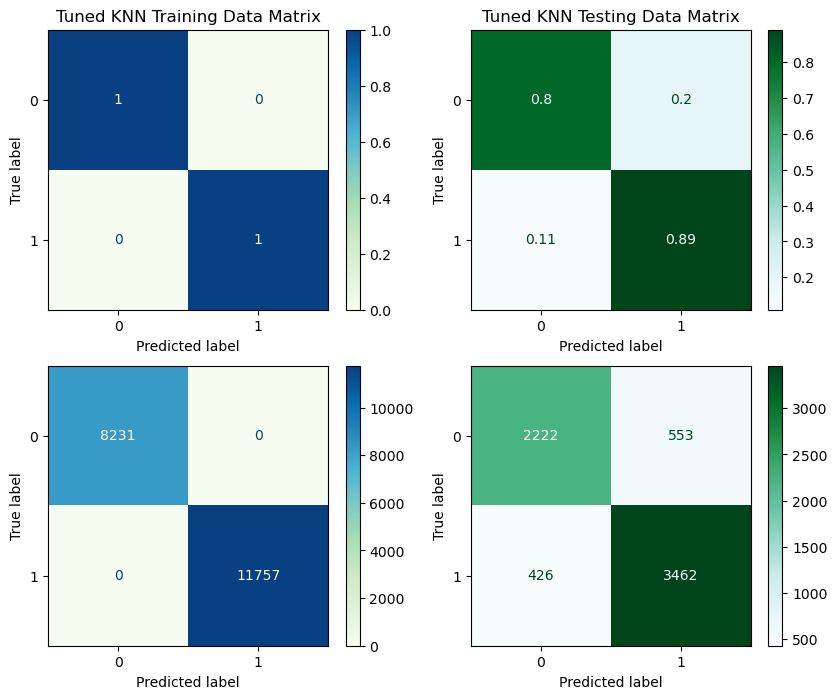

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('Tuned KNN Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('Tuned KNN Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [65]:
tuned_knn = metrics(knn_pipeline2, X_train, y_train, X_test, 
                   y_test, name = 'Tuned KNN Model')
metrics_df = pd.concat([metrics_df, tuned_knn])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123


## Random Forest

In [66]:
rf = RandomForestClassifier(random_state = 42)
rf_pipeline = make_pipeline(preprocessor, rf)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [67]:
rf_train_predictions = rf_pipeline.predict(X_train)
rf_test_predictions = rf_pipeline.predict(X_test)

### Classification Report

In [68]:
#Metrics
print('RF Training Data Metrics:\n', classification_report(y_train, rf_train_predictions))
print('')
print('RF Testing Data Metrics:\n', classification_report(y_test, rf_test_predictions))

RF Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8231
           1       1.00      1.00      1.00     11757

    accuracy                           1.00     19988
   macro avg       1.00      1.00      1.00     19988
weighted avg       1.00      1.00      1.00     19988


RF Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      2775
           1       0.87      0.90      0.88      3888

    accuracy                           0.86      6663
   macro avg       0.86      0.86      0.86      6663
weighted avg       0.86      0.86      0.86      6663



### Confusion Matrix

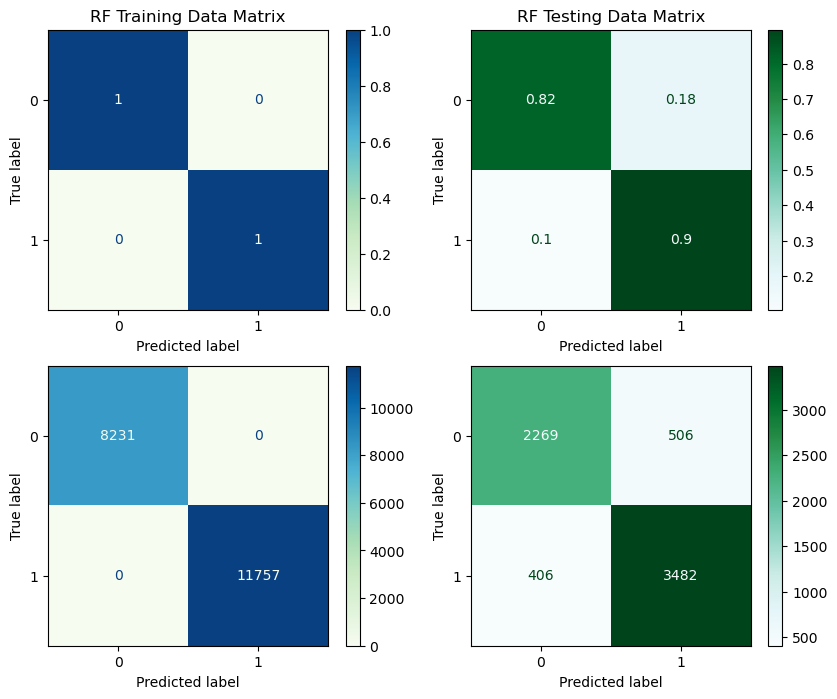

In [69]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [70]:
rf_ = metrics(rf_pipeline, X_train, y_train, X_test, 
                   y_test, name = 'RF Model')
metrics_df = pd.concat([metrics_df, rf_])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123
RF Model,1.000000,1.000000,1.000000,1.000000,0.863125,0.895576,0.873119,0.884205


## Tuned Random Forest

In [71]:
rf_pipeline.get_params() #gets the parameters so I can tune in the model

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                     

In [72]:
rf_parameters_dict = {'randomforestclassifier__max_depth' : list(range(1, 200, 50)),
                      'randomforestclassifier__n_estimators': list(range(1, 300, 50)),
                      'randomforestclassifier__n_jobs' : [-1],
                      'randomforestclassifier__max_leaf_nodes': list(range(1, 50, 10))}

### GridSearch

In [73]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_parameters_dict)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [1, 51, 101, 151],
                         'randomforestclassifier__max_leaf_nodes': [1, 11, 21,
                                                                    31, 41],
                         'randomforestclassifier__n_estimators': [1, 51, 101,
                                                                  151, 201,
                                                                  251],
                         'randomforestclassifier__n_jobs': [-1]})

In [74]:
rf_grid_search.best_params_

{'randomforestclassifier__max_depth': 51,
 'randomforestclassifier__max_leaf_nodes': 41,
 'randomforestclassifier__n_estimators': 151,
 'randomforestclassifier__n_jobs': -1}

In [75]:
#set the best params to the classifier
rf2 = RandomForestClassifier(max_depth = 51, n_estimators = 151, 
                             max_leaf_nodes = 41, n_jobs = -1, 
                             random_state = 42) 
rf_pipeline2 = make_pipeline(preprocessor, rf2)
rf_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=51, max_leaf_nodes=41,
                                        n_estimators=151, n_jobs=-1,
                                        random_state=42))])

In [76]:
#gather predictions for the tuned model
rf_train_predictions2 = rf_pipeline2.predict(X_train)
rf_test_predictions2 = rf_pipeline2.predict(X_test)

### Classification Report

In [77]:
#Metrics
print('Tuned RF Training Data Metrics:\n', classification_report(y_train, rf_train_predictions2))
print('')
print('Tuned RF Testing Data Metrics:\n', classification_report(y_test, rf_test_predictions2))

Tuned RF Training Data Metrics:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      8231
           1       0.86      0.91      0.88     11757

    accuracy                           0.86     19988
   macro avg       0.86      0.85      0.85     19988
weighted avg       0.86      0.86      0.86     19988


Tuned RF Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      2775
           1       0.84      0.90      0.87      3888

    accuracy                           0.84      6663
   macro avg       0.84      0.83      0.84      6663
weighted avg       0.84      0.84      0.84      6663



### Confusion Matrix

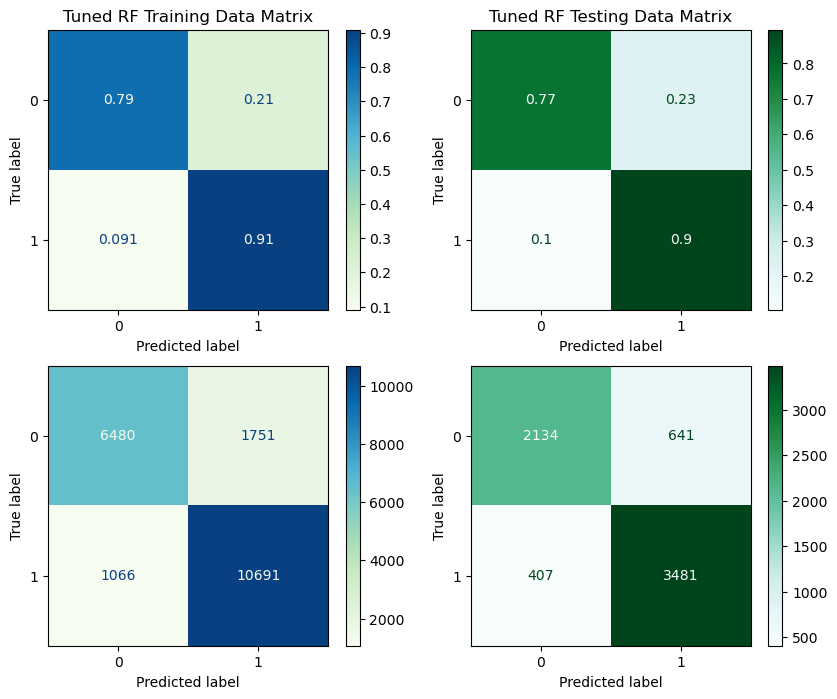

In [78]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('Tuned RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('Tuned RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Model Analysis

In [79]:
tuned_rf = metrics(rf_pipeline2, X_train, y_train, X_test, 
                   y_test, name = 'Tuned RF Model')
metrics_df = pd.concat([metrics_df, tuned_rf])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123
RF Model,1.000000,1.000000,1.000000,1.000000,0.863125,0.895576,0.873119,0.884205
Tuned RF Model,0.859065,0.909331,0.859267,0.883590,0.842713,0.895319,0.844493,0.869164


The model with the best metrics is the Tuned LR model. I am going to see if I can make it better with PCA. I am also going to use PCA on the Tuned KNN & RF Models. 

## PCA on Tuned LR Model

In [80]:
pca = PCA(n_components=.95)
pca_processor = make_pipeline(preprocessor, pca)

In [81]:
pca_tuned_lr_pipe = make_pipeline(pca_processor, log_reg2)
pca_tuned_lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced', n_jobs=-1,
                                    penalty='l1', solver='liblinear'))])

In [82]:
pca_lr_train_predictions = pca_tuned_lr_pipe.predict(X_train)
pca_lr_test_predictions = pca_tuned_lr_pipe.predict(X_test)

### Classification Report

In [83]:
#Metrics
print('PCA Tuned LR Training Data Metrics:\n', classification_report(y_train, pca_lr_train_predictions))
print('')
print('PCA Tuned LR Testing Data Metrics:\n', classification_report(y_test, pca_lr_test_predictions))

PCA Tuned LR Training Data Metrics:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      8231
           1       0.89      0.84      0.87     11757

    accuracy                           0.85     19988
   macro avg       0.84      0.85      0.84     19988
weighted avg       0.85      0.85      0.85     19988


PCA Tuned LR Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      2775
           1       0.89      0.83      0.86      3888

    accuracy                           0.84      6663
   macro avg       0.84      0.85      0.84      6663
weighted avg       0.85      0.84      0.84      6663



### Confusion Matrix

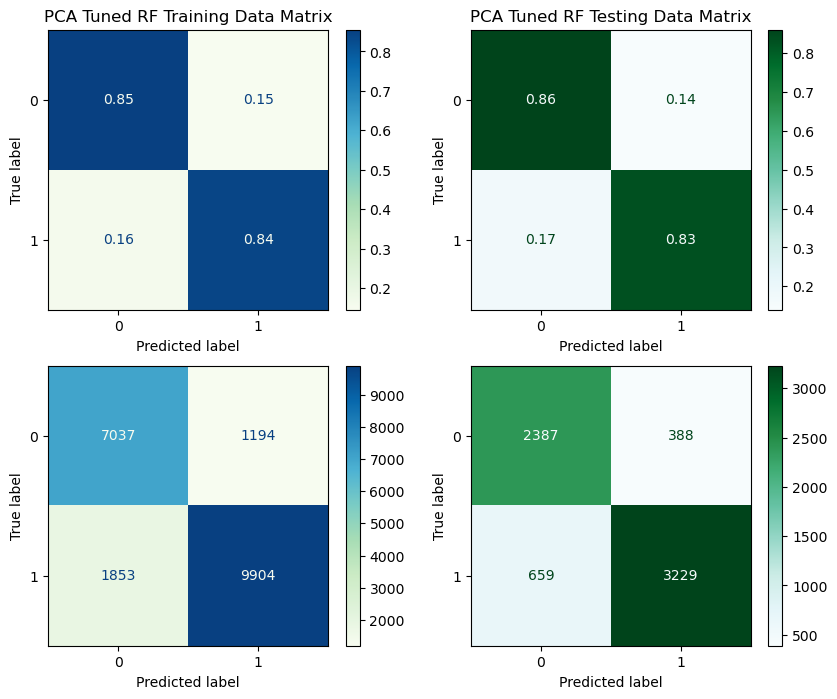

In [84]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, pca_lr_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('PCA Tuned RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, pca_lr_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('PCA Tuned RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, pca_lr_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, pca_lr_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [85]:
pca_lr = metrics(pca_tuned_lr_pipe, X_train, y_train, X_test, 
                   y_test, name = 'PCA Tuned LR Model')
metrics_df = pd.concat([metrics_df, pca_lr])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123
RF Model,1.000000,1.000000,1.000000,1.000000,0.863125,0.895576,0.873119,0.884205
Tuned RF Model,0.859065,0.909331,0.859267,0.883590,0.842713,0.895319,0.844493,0.869164
PCA Tuned LR Model,0.847559,0.842392,0.892413,0.866681,0.842864,0.830504,0.892729,0.860493


## PCA on Tuned KNN

In [86]:
pca_tuned_knn_pipe = make_pipeline(pca_processor, knn2)
pca_tuned_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=17,
                                      weights='distance'))])

In [87]:
pca_knn_train_predictions = pca_tuned_knn_pipe.predict(X_train)
pca_knn_test_predictions = pca_tuned_knn_pipe.predict(X_test)

### Classification Report

In [88]:
#Metrics
print('PCA Tuned KNN Training Data Metrics:\n', classification_report(y_train, pca_knn_train_predictions))
print('')
print('PCA Tuned KNN Testing Data Metrics:\n', classification_report(y_test, pca_knn_test_predictions))

PCA Tuned KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8231
           1       1.00      1.00      1.00     11757

    accuracy                           1.00     19988
   macro avg       1.00      1.00      1.00     19988
weighted avg       1.00      1.00      1.00     19988


PCA Tuned KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      2775
           1       0.86      0.89      0.87      3888

    accuracy                           0.85      6663
   macro avg       0.85      0.84      0.84      6663
weighted avg       0.85      0.85      0.85      6663



### Confusion Matrix

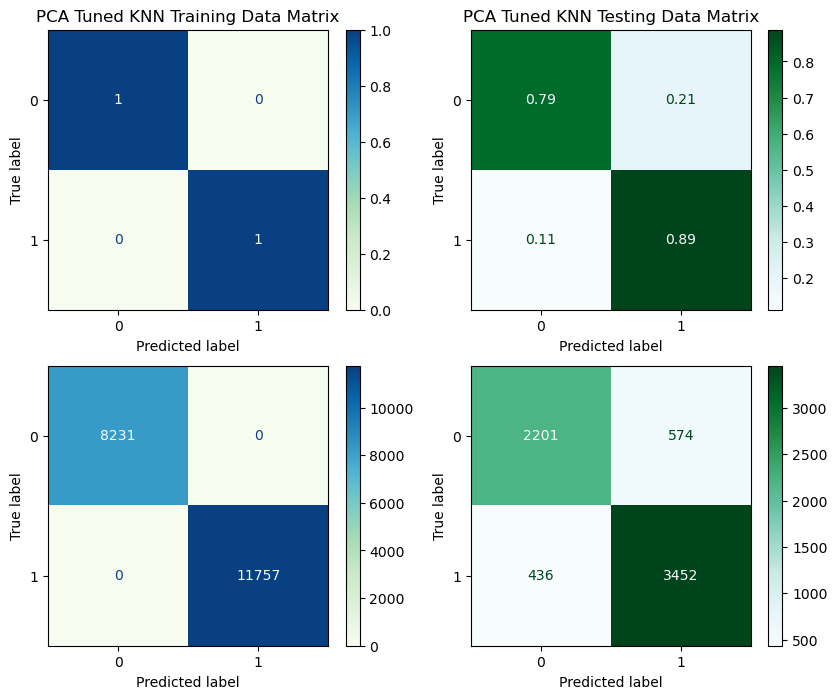

In [89]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, pca_knn_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('PCA Tuned KNN Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, pca_knn_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('PCA Tuned KNN Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, pca_knn_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, pca_knn_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [90]:
pca_knn = metrics(pca_tuned_knn_pipe, X_train, y_train, X_test, 
                   y_test, name = 'PCA Tuned KNN Model')
metrics_df = pd.concat([metrics_df, pca_knn])
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123
RF Model,1.000000,1.000000,1.000000,1.000000,0.863125,0.895576,0.873119,0.884205
Tuned RF Model,0.859065,0.909331,0.859267,0.883590,0.842713,0.895319,0.844493,0.869164
PCA Tuned LR Model,0.847559,0.842392,0.892413,0.866681,0.842864,0.830504,0.892729,0.860493
PCA Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.848417,0.887860,0.857427,0.872378


## PCA on RF

In [91]:
pca_rf_pipe = make_pipeline(pca_processor, rf)
pca_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x157c34880>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [92]:
pca_rf_train_predictions = pca_rf_pipe.predict(X_train)
pca_rf_test_predictions = pca_rf_pipe.predict(X_test)

### Classification Report

In [93]:
#Metrics
print('PCA RF Training Data Metrics:\n', classification_report(y_train, pca_rf_train_predictions))
print('')
print('PCA RF Testing Data Metrics:\n', classification_report(y_test, pca_rf_test_predictions))

PCA RF Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8231
           1       1.00      1.00      1.00     11757

    accuracy                           1.00     19988
   macro avg       1.00      1.00      1.00     19988
weighted avg       1.00      1.00      1.00     19988


PCA RF Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2775
           1       0.87      0.88      0.87      3888

    accuracy                           0.85      6663
   macro avg       0.85      0.85      0.85      6663
weighted avg       0.85      0.85      0.85      6663



### Confusion Matrix

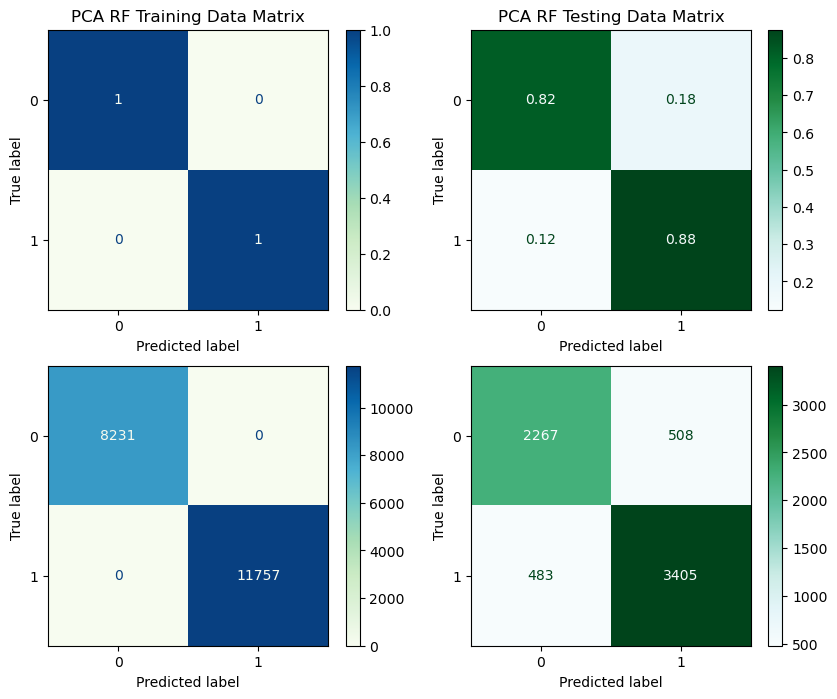

In [94]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, pca_rf_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('PCA RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, pca_rf_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('PCA RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, pca_rf_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, pca_rf_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

In [95]:
pca_rf = metrics(pca_rf_pipe, X_train, y_train, X_test, 
                   y_test, name = 'PCA RF Model')
metrics_df = pd.concat([metrics_df, pca_rf])

## Overall Analysis

In [96]:
metrics_df

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Default LR Model,0.873224,0.902526,0.884324,0.893332,0.871379,0.897891,0.883574,0.890675
Tuned LR Model,0.864919,0.860934,0.904800,0.882322,0.860873,0.851595,0.904398,0.877202
KNN Model,0.890784,0.920728,0.896406,0.908404,0.840612,0.880401,0.851493,0.865706
Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.853069,0.890432,0.862267,0.876123
RF Model,1.000000,1.000000,1.000000,1.000000,0.863125,0.895576,0.873119,0.884205
Tuned RF Model,0.859065,0.909331,0.859267,0.883590,0.842713,0.895319,0.844493,0.869164
PCA Tuned LR Model,0.847559,0.842392,0.892413,0.866681,0.842864,0.830504,0.892729,0.860493
PCA Tuned KNN Model,1.000000,1.000000,1.000000,1.000000,0.848417,0.887860,0.857427,0.872378
PCA RF Model,1.000000,1.000000,1.000000,1.000000,0.851268,0.875772,0.870176,0.872965


The model I would use to predict the outcome of the team winning is the Tuned LR Model. It has the best overall accuracy by predicting the most correct wins and losses. The PCA models ran very quick and performed very well on the tuned KNN and the RF model, but gave lower results. Since accurately predicting the winner is the most important metric, the Default LR Model wins because it has a 87.1% accuracy.  Out of 6,663 predictions it only got 857 of them incorrect. There were 397 false negatives and 460 false positives. All of the models gave me similar results but this one gave me the best values for false negatives.